In [66]:
% cd C:\Users\wolfg\Desktop\Uni\UCL\Econometrics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import colors as mcolors
import pandas as pd
from sklearn.preprocessing import StandardScaler

C:\Users\wolfg\Desktop\Uni\UCL\Econometrics


In [67]:
x_data = sio.loadmat('x_data.mat')
y_data = sio.loadmat('y_data.mat')

In [68]:
X = x_data['x']
y = y_data['y'].reshape(y_data['y'].shape[0]).astype(int)

In [69]:
[m, n] = X.shape

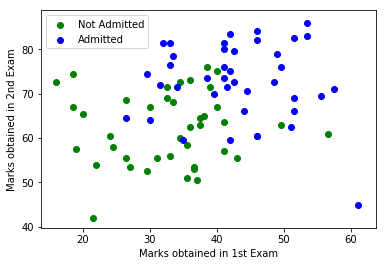

In [70]:
% matplotlib inline
x0 = np.ones((np.array([x for x in y if x == 0]).shape[0], 
              X.shape[1]))
x1 = np.ones((np.array([x for x in y if x == 1]).shape[0], 
              X.shape[1]))
#x0 and x1 are matrices containing +ve and -ve examples from the
#dataset, initialized to 1
k0 = k1 = 0
for i in range(0,y.shape[0]):
    if y[i] == 0:
        x0[k0] = X[i]
        k0 = k0 + 1
    else:
        x1[k1] = X[i]
        k1 = k1 + 1
X_list = [x0, x1]
colors = ["green", "blue"] # 2 distinct colours for 2 classes 
import matplotlib.pyplot as plt
for x, c in zip(X_list, colors):
    if c == "green":
        plt.scatter(x[:,0],x[:,1],color = c,label = "Not Admitted")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "Admitted")
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")
plt.legend()

In [71]:
X = np.c_[np.ones((X.shape[0], 1)), X]

In [72]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [73]:
# Newton's Method

MAX_ITER = 10
J = np.zeros((MAX_ITER,1))
theta = np.zeros(n+1)


for i in range(MAX_ITER):
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    grad = (1/m)*np.dot(X.T,(h-y))
    
    H = (1/m) * X.T @ np.diag(h) @ np.diag(1-h) @ X
    
    J[(i)] = (1/m)*sum(-y*np.log(h) - (1-y)*np.log(1-h))
    
    theta = theta - np.linalg.solve(H, grad)

#for i in range(MAX_ITER):
    
#    z = np.dot(X, theta)
#    h = sigmoid(z)
    
#    grad = (1/m)*np.dot(X.T,(h-y))
    
#    H = (1/m) * X.T @ np.diag(h) @ np.diag(1-h) @ X
    
#    J[(i)] = sum(y*np.log(h) + (1-y)*np.log(1-h))
    
#    theta = theta - np.linalg.solve(H, grad)

In [74]:
theta

array([-16.37874341,   0.14834077,   0.15890845])

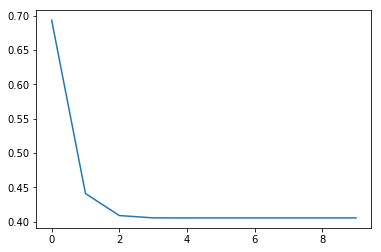

In [75]:
plt.plot(range(len(J)),J)

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=False, C = 1000)
result = clf.fit(X, y)
predictions = result.predict(X)
print(result.intercept_)
print(result.coef_)

0.0
[[-16.07257721   0.1460184    0.15573279]]


In [77]:
from sklearn.metrics import log_loss
-log_loss(np.array(y), result.predict_proba(X).T[1], normalize=False)

-32.439342004103395

In [78]:
data = pd.read_stata("LogisticRegression_data.dta")
data = pd.concat([data, pd.get_dummies(data['rank'])], axis = 1)
data = data.drop(data.columns[3:5], axis=1)
y = np.array(data.iloc[:,0]).astype(int)
X = np.array(data.iloc[:,1:])
[m, n] = X.shape
X = np.c_[np.ones((X.shape[0], 1)), X]

In [79]:
# Newton's Method as Gradient DESCENT

MAX_ITER = 10
J = np.zeros((MAX_ITER,1))
theta = np.zeros(n+1)

for i in range(MAX_ITER):
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    grad = (1/m)*np.dot(X.T,(h-y))
    
    H = (1/m) * X.T @ np.diag(h) @ np.diag(1-h) @ X
    
    J[(i)] = sum(y*np.log(h) + (1-y)*np.log(1-h))
    
    theta = theta - np.linalg.solve(H, grad)

print(theta, J[-1])

[-3.98997938e+00  2.26442569e-03  8.04037654e-01 -6.75442930e-01
 -1.34020393e+00 -1.55146368e+00] [-229.25874543]


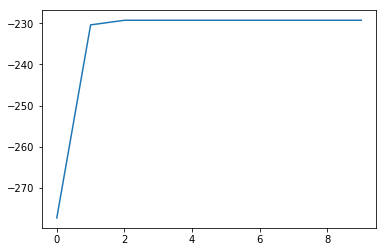

In [80]:
plt.plot(range(MAX_ITER), J)

In [81]:
# Logistic Regression without standardization

clf = LogisticRegression(fit_intercept=False, C = 1000)
result = clf.fit(X, y)
predictions = result.predict(X)
print(result.intercept_)
print(result.coef_)
print(-log_loss(np.array(y), result.predict_proba(X).T[1], normalize=False))

0.0
[[-3.97300745e+00  2.25462584e-03  8.00527738e-01 -6.74666557e-01
  -1.33709231e+00 -1.55029044e+00]]
-229.25893493103598


In [82]:
# Logistic Regression WITH standardization

X.T[1] = (X.T[1] - np.mean(X.T[1]))/(np.std(X.T[1], ddof=1))
X.T[2] = (X.T[2] - np.mean(X.T[2]))/(np.std(X.T[2], ddof=1))
clf = LogisticRegression(fit_intercept=False, C = 1000)
result = clf.fit(X, y)
predictions = result.predict(X)
print(result.intercept_)
print(result.coef_)
print(-log_loss(np.array(y), result.predict_proba(X).T[1], normalize=False))

0.0
[[ 0.0661837   0.2615805   0.30598638 -0.67517844 -1.33990112 -1.5510252 ]]
-229.2587460763963


In [83]:
result.predict_proba(X)

array([[0.8273663 , 0.1726337 ],
       [0.70781383, 0.29218617],
       [0.26163995, 0.73836005],
       [0.82158694, 0.17841306],
       [0.88162578, 0.11837422],
       [0.6300245 , 0.3699755 ],
       [0.58081318, 0.41918682],
       [0.7829938 , 0.2170062 ],
       [0.799256  , 0.200744  ],
       [0.48212825, 0.51787175],
       [0.62564134, 0.37435866],
       [0.59985926, 0.40014074],
       [0.27951179, 0.72048821],
       [0.64654035, 0.35345965],
       [0.30767359, 0.69232641],
       [0.81416683, 0.18583317],
       [0.66001824, 0.33998176],
       [0.92104231, 0.07895769],
       [0.45976796, 0.54023204],
       [0.4265498 , 0.5734502 ],
       [0.83877136, 0.16122864],
       [0.5627249 , 0.4372751 ],
       [0.87160272, 0.12839728],
       [0.80792118, 0.19207882],
       [0.56240101, 0.43759899],
       [0.31775834, 0.68224166],
       [0.42157976, 0.57842024],
       [0.79521535, 0.20478465],
       [0.57692111, 0.42307889],
       [0.54176284, 0.45823716],
       [0.

In [84]:
# Newton's method as Gradient ASCENT without standardized data!

data = pd.read_stata("LogisticRegression_data.dta")
data = pd.concat([data, pd.get_dummies(data['rank'])], axis = 1)
data = data.drop(data.columns[3:5], axis=1)
y = np.array(data.iloc[:,0]).astype(int)
X = np.array(data.iloc[:,1:])
[m, n] = X.shape
X = np.c_[np.ones((X.shape[0], 1)), X]

MAX_ITER = 10
J = np.zeros((MAX_ITER,1))
theta = np.zeros(n+1)

for i in range(MAX_ITER):
    
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    grad = (1/m)*np.dot(X.T,(y-h))
    
    H = (1/m) * X.T @ np.diag(h) @ np.diag(1-h) @ X
    
    J[(i)] = sum(y*np.log(h) + (1-y)*np.log(1-h))
    
    theta = theta + np.linalg.solve(H, grad) # same as theta + inv(H)*grad

print(theta, J[-1])

[-3.98997938e+00  2.26442569e-03  8.04037654e-01 -6.75442930e-01
 -1.34020393e+00 -1.55146368e+00] [-229.25874543]


[340412.65957447 110631.0385816   -6649.48596807]


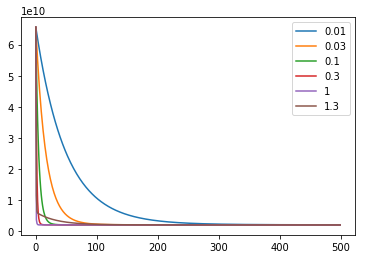

In [85]:
# Linear regression as Gradient Descent, incl. standardization of continuous variables

x_data = sio.loadmat('x_data3.mat')
y_data = sio.loadmat('y_data3.mat')
X = x_data['x'].astype(float)
y = y_data['y'].reshape(y_data['y'].shape[0]).astype(float)
X.T[1] = (X.T[1] - np.mean(X.T[1]))/(np.std(X.T[1], ddof=1)) # we have to tell numpy to apply the DF correction, otherwise
X.T[2] = (X.T[2] - np.mean(X.T[2]))/(np.std(X.T[2], ddof=1)) # it would only divide sum by N

m = len(y)
MAX_ITER = 1000

theta_grad_descent = np.zeros(X.shape[1])
alpha = [0.01, 0.03, 0.1, 0.3, 1, 1.3]
J_list = []

for i in range(len(alpha)):
    
    theta = np.zeros(X.shape[1]).T
    J = np.zeros((MAX_ITER,1))


    for j in range(MAX_ITER):
        
        loss = (0.5/m) * (X @ theta - y).T @ (X @ theta - y)
        # print(loss)
        J[(j)] = loss
        grad = (1/m) * (X.T @ ((X @ theta) - y))
    
        theta = theta - alpha[i] * grad
        
    J_list.append(J)

print(theta)

for idx, i in enumerate(J_list):
    
    plt.plot(range(500), i[:500], label = alpha[idx])

plt.legend()

# best learning rate = 1

[ 0.06638933  0.26157946  0.30599013 -0.67539742 -1.34015547 -1.55140317]


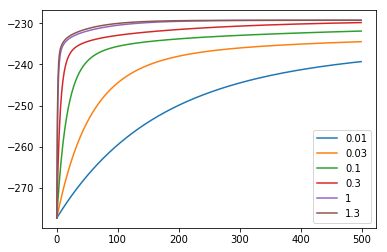

In [108]:
# Logistic regression as Gradient Ascent, incl. standardization

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

data = pd.read_stata("LogisticRegression_data.dta")
data = pd.concat([data, pd.get_dummies(data['rank'])], axis = 1)
data = data.drop(data.columns[3:5], axis=1)
y = np.array(data.iloc[:,0]).astype(int)
X = np.array(data.iloc[:,1:])
[m, n] = X.shape
X = np.c_[np.ones((X.shape[0], 1)), X]

X.T[1] = (X.T[1] - np.mean(X.T[1]))/(np.std(X.T[1], ddof=1))
X.T[2] = (X.T[2] - np.mean(X.T[2]))/(np.std(X.T[2], ddof=1))

m = len(y)
MAX_ITER = 1000

theta_grad_descent = np.zeros(X.shape[1])
alpha = [0.01, 0.03, 0.1, 0.3, 1, 1.3]

J_list = []

for i in range(len(alpha)):
    
    theta = np.zeros(X.shape[1]).T
    
    J = np.zeros((MAX_ITER,1))

    for j in range(MAX_ITER):
        
        z = np.dot(X, theta)
                
        h = sigmoid(z) # this gives the probability that the observation is 1
        
        #if i == 0 and j == 1:
            
            #print(h)
    
        grad = (1/m)*np.dot(X.T,(y-h))
        
        loglikelihood = sum(y*np.log(h) + (1-y)*np.log(1-h))
        
        #print(alpha[i], j, loglikelihood)
        
        J[(j)] = loglikelihood    
    
        theta = theta + alpha[i] * grad
        
    J_list.append(J)

print(theta)

for idx, i in enumerate(J_list):
    
    plt.plot(range(500), i[:500], label = alpha[idx])

plt.legend()

In [109]:
sigmoid(np.dot(X, theta))[:5] # y_hat

array([0.17262732, 0.29217653, 0.73840057, 0.17838744, 0.11835583])

In [120]:
data = pd.read_stata("LogisticRegression_data.dta")
data = pd.concat([data, pd.get_dummies(data['rank'])], axis = 1)
data = data.drop(data.columns[3:5], axis=1)
y = np.array(data.iloc[:,0]).astype(int)
X = np.array(data.iloc[:,1:])
[m, n] = X.shape
X = np.c_[np.ones((X.shape[0], 1)), X]

beta1_mean, beta1_std = X.T[1].mean(), np.std(X.T[1], ddof = 1)
beta2_mean, beta2_std = X.T[2].mean(), np.std(X.T[2], ddof = 1)

In [126]:
intercept_unstandardized = theta[0] - (theta[1]*beta1_mean/beta1_std + theta[2]*beta2_mean/beta2_std)
theta1_unstandardized = theta[1]/beta1_std
theta2_unstandardized = theta[2]/beta2_std

In [201]:
# Logistic regression as Gradient Ascent, WITHOUT standardization --> vanishing gradient problem!

from scipy.special import expit

def sigmoid(x):
    
    # tanh = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    
    return 1/(1+expit(-x))

def relu(x):
    
    return np.maximum(0,x)

data = pd.read_stata("LogisticRegression_data.dta")
data = pd.concat([data, pd.get_dummies(data['rank'])], axis = 1)
data = data.drop(data.columns[3:5], axis=1)
y = np.array(data.iloc[:,0]).astype(int)
X = np.array(data.iloc[:,1:])
[m, n] = X.shape
X = np.c_[np.ones((X.shape[0], 1)), X]

#X.T[1] = (X.T[1] - np.mean(X.T[1]))/(np.std(X.T[1], ddof=1))
#X.T[2] = (X.T[2] - np.mean(X.T[2]))/(np.std(X.T[2], ddof=1))

m = len(y)
MAX_ITER = 1000

theta_grad_descent = np.zeros(X.shape[1])
alpha = [0.000001, 0.00001]
J_list = []

for i in range(len(alpha)):
    
    theta = np.zeros(X.shape[1]).T
    
    J = np.zeros((MAX_ITER,1))

    for j in range(MAX_ITER):
        
        z = np.dot(X, theta)
                
        h = sigmoid(z)
        
        #if i == 0 and j == 1:
            
            #print(h)
    
        grad = (1/m)*np.dot(X.T,(y-h))
        
        loglikelihood = sum(y*np.log(h) + (1-y)*np.log(1-h))
        
        #print(alpha[i], j, loglikelihood)
        
        J[(j)] = loglikelihood    
    
        theta = theta + alpha[i] * grad
        
    J_list.append(J)

print(theta)

[-1.82820679e-03 -9.75314081e-01 -5.88202885e-03 -5.38686027e-04
 -8.13498425e-04 -5.38050805e-04]


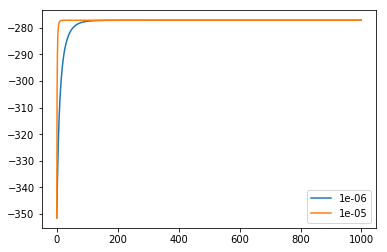

In [202]:
for idx, i in enumerate(J_list):
    
    plt.plot(range(1000), i[:1000], label = alpha[idx])

plt.legend()

In [200]:
data.to_csv("Logistic_Regression_Dataset.csv", sep = ";")